In [1]:
import numpy as np
import pandas as pd
import pandasql as ps

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

In [2]:
countries = ['China', 'Germany', 'India', 'United States']

df = pd.read_csv('./Data/policies.csv', index_col=0)
df = df[(df['Year'] >= 2004) & (df['Year'] <= 2016)]
df = df.replace('People\'s Republic Of China', countries[0])

In [3]:
query = """
    SELECT Year, Country, COUNT(*) AS Policies
    FROM df
    WHERE Status IS 'In force'
    GROUP BY Year, Country
    ORDER BY Country
"""

in_force = ps.sqldf(query)

In [4]:
query = """
    SELECT Year, Country, COUNT(*) AS Policies
    FROM df
    WHERE Status IS 'Ended'
    GROUP BY Year, Country
    ORDER BY Country
"""
ended = ps.sqldf(query)

In [5]:
def reindex(df, country, start, end):
    df = df.set_index('Year')
    
    idx = np.arange(start, end)
    df = df.reindex(idx)
    
    df['Policies'] = df['Policies'].fillna(0)
    df['Country'] = df['Country'].fillna(country)
    
    df.reset_index(drop=False)
    
    return df

In [6]:
df = None

for country in countries:
    x = in_force[in_force['Country'] == country]
    x = reindex(x, country, 2004, 2017)
    
    y = ended[ended['Country'] == country]
    y = reindex(y, country, 2004, 2017)
    
    sub_df = pd.merge(x, y, on=['Year', 'Country'])
    sub_df['Number of policies'] = sub_df['Policies_x'].cumsum() + sub_df['Policies_y']
    sub_df = sub_df.drop(['Policies_x', 'Policies_y'], axis=1)
    
    if df is not None:
        df = pd.concat([df, sub_df])
    else:
        df = sub_df

In [7]:
df.to_csv('./Data Formated/policies.csv')

<AxesSubplot:xlabel='Year', ylabel='Number of policies'>

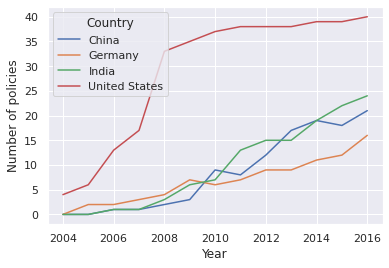

In [8]:
sns.lineplot(data=df, x='Year', y='Number of policies', hue='Country')